In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
# Get current directory
%pwd

'c:\\Users\\tunhi\\OneDrive\\Documents\\Github\\mlp_test\\research'

In [4]:
# Use os to change directory to main project folder 
# ../ (go back 1 folder_
os.chdir('../')

In [5]:
# Get current directory
%pwd

'c:\\Users\\tunhi\\OneDrive\\Documents\\Github\\mlp_test'

In [6]:
train = pd.read_csv('artifacts\\data_ingestion\\train.csv')
test = pd.read_csv('artifacts\\data_ingestion\\test.csv')


In [7]:
print(train.shape)
print(test.shape)

(193573, 11)
(129050, 10)


In [22]:
test.shape[0]/data.shape[0]

0.40000247967441876

In [8]:
data = pd.concat([train,test])

In [1]:
! pip install catboost


In [21]:
data.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [9]:
data.isnull().sum()

id              0
carat           0
cut             0
color           0
clarity         0
depth           0
table           0
x               0
y               0
z               0
price      129050
dtype: int64

In [10]:
# Separate numerical and categorical variables into different df
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
num_cols = data.select_dtypes(include=['float64','int64']).columns.tolist()   # continuous + discrete
print('No. of Categorical Variables:', len(cat_cols))
print(cat_cols)
print(' ')
print('No. of Numerical Variables:', len(num_cols))
print(num_cols)

No. of Categorical Variables: 3
['cut', 'color', 'clarity']
 
No. of Numerical Variables: 8
['id', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price']


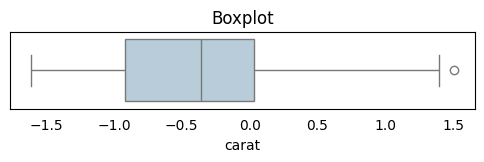

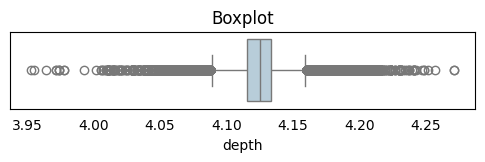

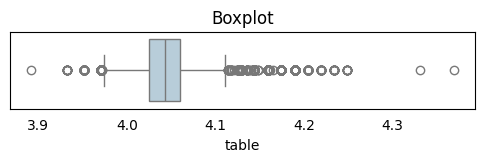

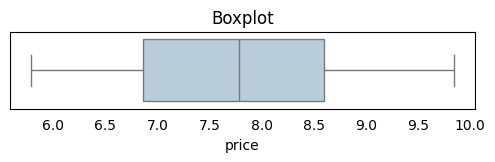

In [11]:
import seaborn as sns

for feature in num_cols:
    data2=data.copy()
    
    if 0 in data[feature].unique():
        pass
    else:
        plt.figure(figsize = (6, 1))
        data[feature]=np.log(data[feature])
        ax = sns.boxplot(data=data, x=feature,color='#b3cede')
        ax.tick_params(left=False, bottom=False) # Remove ticks
        plt.title('Boxplot')
        plt.show()
        
    

In [12]:
# Check for duplicates
print('Shape of dataframe:', data.shape)
print('Shape of dataframe with duplicates dropped:', data.drop_duplicates().shape)

df_row = len(data)
df_row_no_dupe = len(data.drop_duplicates())
df_row_dupe = df_row - df_row_no_dupe

print('No. of rows with duplicates :', df_row_dupe)

Shape of dataframe: (322623, 11)
Shape of dataframe with duplicates dropped: (322623, 11)
No. of rows with duplicates : 0


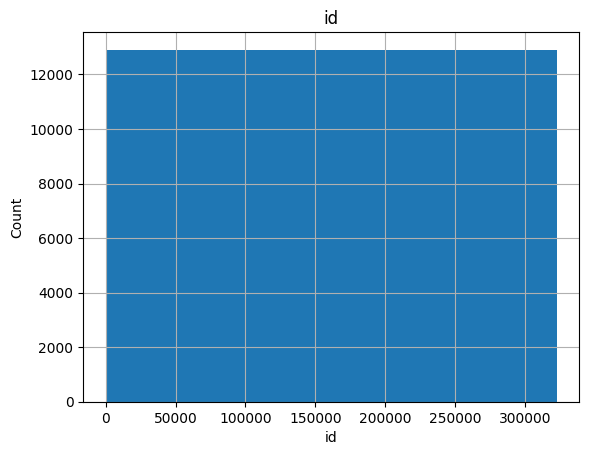

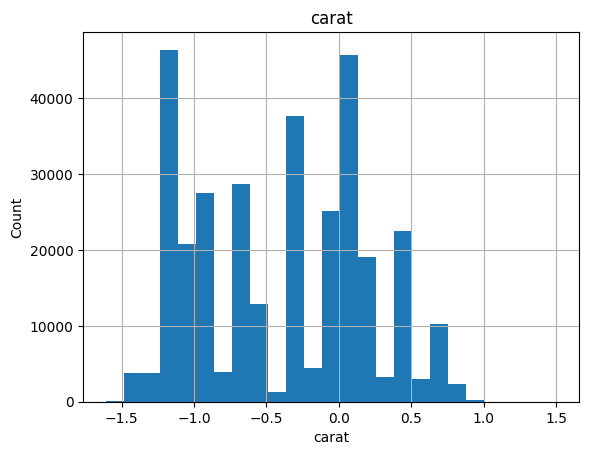

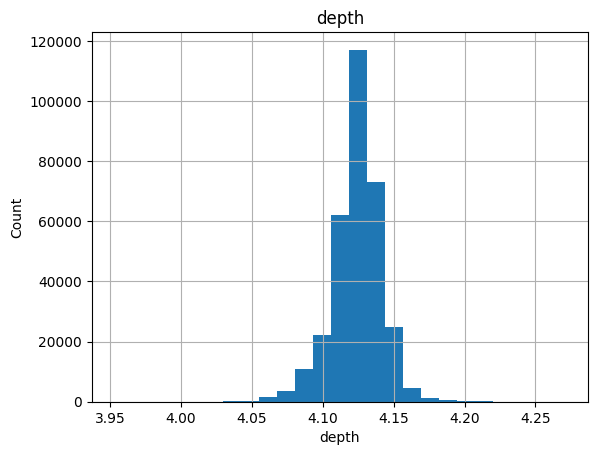

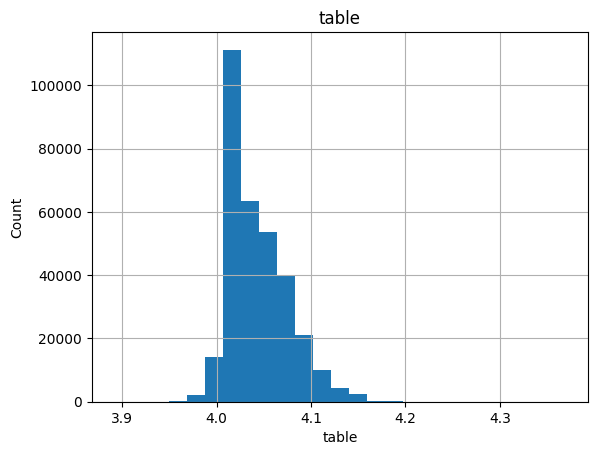

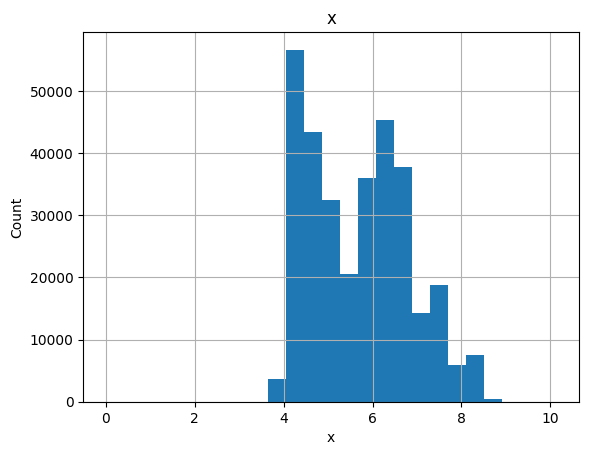

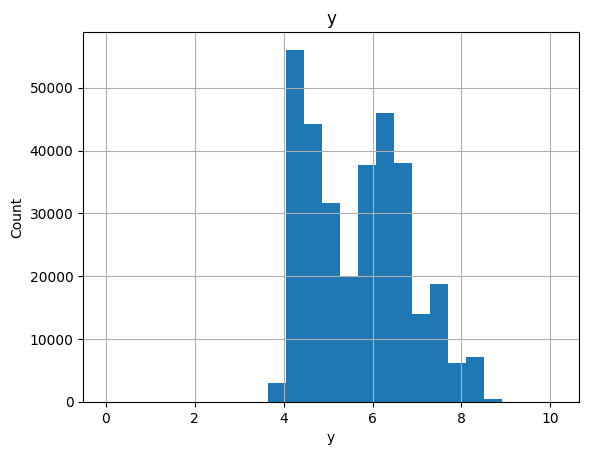

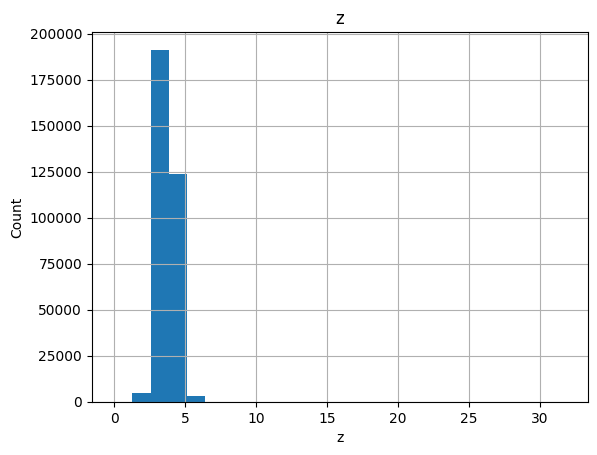

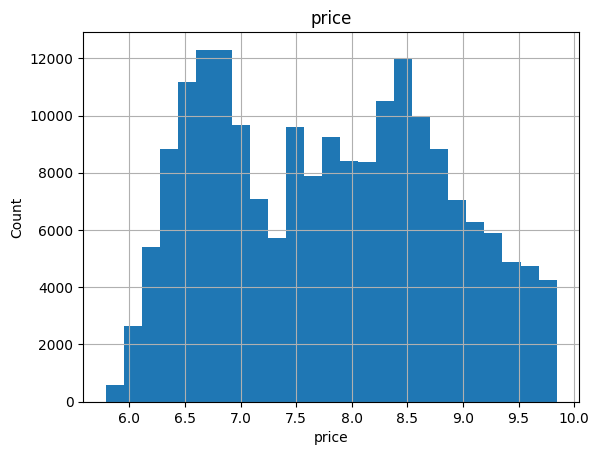

In [15]:
for feature in num_cols:
    data2=data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()